In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
tf.__version__

'2.7.0'

In [13]:
data_dir = 'PokemonData/'
train_dir = data_dir + 'train/'
test_dir = data_dir + 'test/'
validation_dir = data_dir + 'validation/'
model_dir = 'models/'
input_dir = 'input/'

In [4]:
model = tf.keras.models.load_model(model_dir + 'resnet1.h5')

2021-12-21 21:17:29.898491: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    class_mode='categorical',
                    target_size=(224, 224))

Found 1127 images belonging to 151 classes.


In [10]:
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

In [6]:
def get_img_and_prediction(path):
    raw = tf.io.read_file(path)
    img = tf.image.decode_jpeg(raw, channels=3)
    image = tf.cast(img, tf.float32) / 255.0
    image = tf.image.resize(image, (224, 224))
    pred = model.predict(np.array([image]))
    
    return img, pred

In [11]:
def what_pokemon_are_you_similiar_to(path):
    img, pred = get_img_and_prediction(path)
    
    pokemon = labels[np.argmax(pred)]    
    pokemon_path = train_dir + pokemon + '/'
    
    img_list = os.listdir(pokemon_path)
    pokemon_rand_img = img_list[np.random.randint(len(img_list))]
    
    print(f'당신은 {pokemon}과 {pred[0][np.argmax(pred)] * 100:.2f}%만큼 닮았어요!')
    
    plt.subplot(121)
    plt.imshow(img)
    plt.axis('off')
    
    plt.subplot(122)
    pokemon_img = plt.imread(pokemon_path + pokemon_rand_img)
    plt.imshow(pokemon_img)
    plt.axis('off')
    plt.show()
    
    

In [43]:
your_img = 'test12.jpeg'

당신은 Gloom과 79.05%만큼 닮았어요!


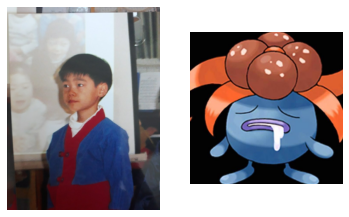

In [44]:
what_pokemon_are_you_similiar_to(input_dir + your_img)